# **Clusterung with categorical and metric data**

To remove the warning messages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 

In [3]:
customers_data = pd.read_csv("https://raw.githubusercontent.com/sravanirachamalla/MLA2021/main/Mall_Customers.csv")

In [4]:
customers_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


To remove the customerID variable from the dataset

In [5]:
customers_data = customers_data.drop('CustomerID', axis=1)

In [6]:
customers_data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


to convert the categorical data into numerical using 
**LabelEncoder**

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encode = LabelEncoder()
encoded_sex = encode.fit_transform(customers_data.iloc[:, 0])
print(encoded_sex)

[1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1]


In [9]:
customers_data['Genre'] = encoded_sex

In [10]:
customers_data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


# **Normalizing the features**

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_customers_data = scaler.fit_transform( customers_data[['Genre',
                                                              'Age', 
                                                'Annual Income (k$)', 
                                                'Spending Score (1-100)']] )

In [12]:
from sklearn.cluster import KMeans
clusters_new = KMeans( 3, random_state=42 )
clusters_new.fit( scaled_customers_data )
customers_data["clusterid_new"] = clusters_new.labels_

In [13]:
customers_data

,Genre,Age,Annual Income (k$),Spending Score (1-100),clusterid_new
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,1
3,0,23,16,77,0
4,0,31,17,40,1
...,...,...,...,...,...
195,0,35,120,79,0
196,0,45,126,28,1
197,1,32,126,74,0
198,1,32,137,18,2


# **Finding Optimal Number of Clusters using Elbow Method**

In [14]:
import matplotlib.pyplot as plt

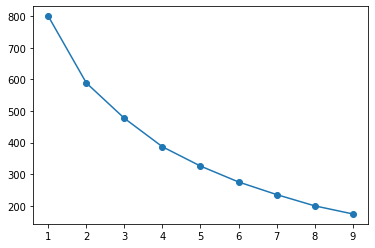

In [15]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( scaled_customers_data )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
#plt.title( "Fig 5: Elbow Diagram");

In [16]:
  k = 5
  clusters = KMeans( k, random_state = 42 )
  clusters.fit( scaled_customers_data )
  customers_data["clusterid"] = clusters.labels_

In [17]:
customers_data[customers_data.clusterid == 0]

,Genre,Age,Annual Income (k$),Spending Score (1-100),clusterid_new,clusterid
130,1,47,71,9,2,0
134,1,20,73,5,2,0
136,0,44,73,7,1,0
138,1,19,74,10,2,0
140,0,57,75,5,1,0
144,1,25,77,12,2,0
148,0,34,78,22,1,0
150,1,43,78,17,2,0
152,0,44,78,20,1,0
154,0,47,78,16,1,0


In [18]:
customers_data[customers_data.clusterid == 1]

,Genre,Age,Annual Income (k$),Spending Score (1-100),clusterid_new,clusterid
8,1,64,19,3,2,1
10,1,67,19,14,2,1
14,1,37,20,13,2,1
18,1,52,23,29,2,1
20,1,35,24,35,2,1
30,1,60,30,4,2,1
32,1,53,33,4,2,1
42,1,48,39,36,2,1
53,1,59,43,60,2,1
55,1,47,43,41,2,1


In [19]:
customers_data[customers_data.clusterid == 2]

,Genre,Age,Annual Income (k$),Spending Score (1-100),clusterid_new,clusterid
0,1,19,15,39,0,2
1,1,21,15,81,0,2
15,1,22,20,79,0,2
17,1,20,21,66,0,2
21,1,25,24,73,0,2
23,1,31,25,73,0,2
25,1,29,28,82,0,2
27,1,35,28,61,0,2
33,1,18,33,92,0,2
41,1,24,38,92,0,2


In [20]:
customers_data[customers_data.clusterid == 3]

,Genre,Age,Annual Income (k$),Spending Score (1-100),clusterid_new,clusterid
3,0,23,16,77,0,3
5,0,22,17,76,0,3
7,0,23,18,94,0,3
9,0,30,19,72,0,3
11,0,35,19,99,0,3
13,0,24,20,77,0,3
19,0,35,23,98,0,3
29,0,23,29,87,0,3
31,0,21,30,73,0,3
35,0,21,33,81,0,3


In [21]:
customers_data[customers_data.clusterid == 4]

,Genre,Age,Annual Income (k$),Spending Score (1-100),clusterid_new,clusterid
2,0,20,16,6,1,4
4,0,31,17,40,1,4
6,0,35,18,6,1,4
12,0,58,20,15,1,4
16,0,35,21,35,1,4
22,0,46,25,5,1,4
24,0,54,28,14,1,4
26,0,45,28,32,1,4
28,0,40,29,31,1,4
34,0,49,33,14,1,4


### Conclusion:

Based on the data from clusters we can see that there are 3 clusters with totally different age of customers. Also it is more usual for older people to have bigger sallary which is as well shown in our results.

As we can see in the cluster 2, people around age 40 have the biggest salary. Based on that the most exclusive items should be directly promoted to people in that age. Younger people, around the age of 25, tend to have lower salaries, but as we can see from Cluster 5 there are people around age 28 whose salary is much bigger (almost double). 

Gender to target in this mall is of course: Females. They tend to buy more stuff, so promotions should be directed to them.


## Business side of Customer clustering

So the real question is how can we use this in our business? Based on the information from the clusters we can decide which strategy to run, what our target should be. There is also a posibility  to conduct an survay on the potential new strategy for one or two segments of customers. Based on that feedback we can decide whether the new strategy is good for that customer segment or not, even before the strategy is released.